In [1]:
import os
import pandas as pd
import geopandas as gpd

local_crs = 32636
example_data_path = "./data"

## Input data fetching

We use the results from our previous examples (1 and 2), but you can use your own prepared GeoDataFrames

In [2]:
# load aggregated info we have
blocks = gpd.read_parquet(os.path.join(example_data_path, "blocks.parquet"))
adjacency_matrix = pd.read_pickle(os.path.join(example_data_path, "adjacency_matrix.pickle"))

In [3]:
from blocksnet.models import City

city_model = City(
  blocks_gdf=blocks, 
  adjacency_matrix=adjacency_matrix, 
)

In [4]:
print(city_model)

CRS:          : EPSG:32636
Blocks count  : 271
Service types : 
    kindergartens : 10 min, 61/1000 population
    schools : 15 min, 120/1000 population
    recreational_areas : 15 min, 6000/1000 population
    hospitals : 60 min, 9/1000 population
    pharmacies : 10 min, 50/1000 population
    policlinics : 15 min, 27/1000 population


In [5]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
            "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

for service_type, gdf in services.items():
  city_model.update_services(service_type, gdf)

In [6]:
buildings = gpd.read_parquet(os.path.join(example_data_path, "buildings.parquet")).to_crs(local_crs)
buildings = buildings.rename(columns={
  'storeys_count': 'floors',
  'population_balanced': 'population',
  'total_area': 'area'
})
city_model.update_buildings(buildings)

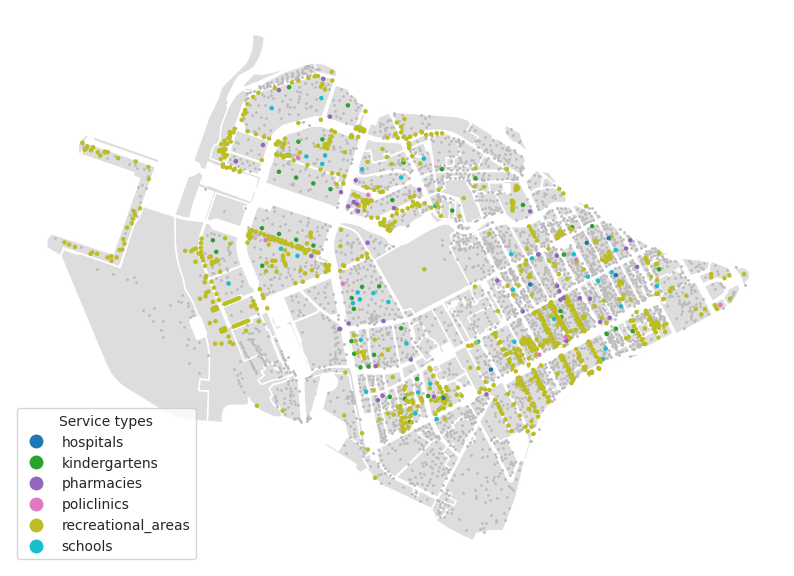

In [7]:
city_model.plot()

Save city model to file so we can use it later

In [8]:
city_model.to_pickle(os.path.join(example_data_path, 'city_model.pickle'))

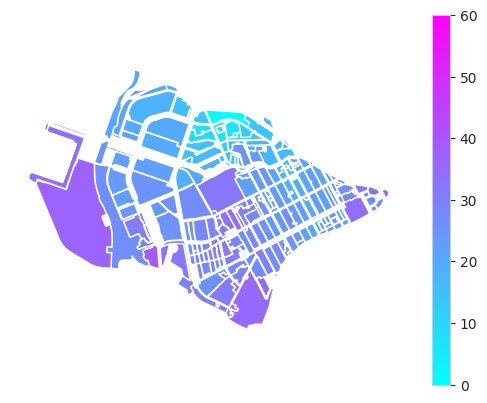

In [9]:
from blocksnet.method import Accessibility

acc = Accessibility(city_model=city_model)
acc.plot(acc.calculate(city_model[135]))

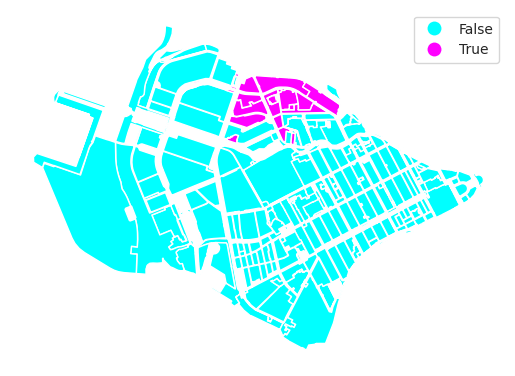

In [10]:
acc.plot(acc.calculate(city_model[135]), 'schools')